# Concepto de filtros pasa baja con aproximación Chebyshev

In [3]:
#NOTE importar bibliotecas
import sympy as sym

import numpy             as np
import matplotlib.pyplot as plt

from scipy import signal


Se define con la función de transferencia
    $$\left |H \right |^2 = \dfrac{1}{ 1+\epsilon^2 T_N^2 \left (\dfrac{\Omega}{\Omega_p}\right) }$$

donde $T_N$ es el polinomio de Chebyshev. El polinomio $n$-ésimo orden se calcula con la siguiente regla recursiva
    $$T_{N+1}(\omega) = 2\omega T_N(\omega) - T_{N-1}(\omega)$$

In [99]:
def cheby_poly(n,N,Tn,Tnp,X):
    Tnx = 0
    if n < N-1:
        Tnx = 2*w*Tn - Tnp
        cheby_poly(n+1,N,Tnx,Tn,X)
        X.append(Tnx)

In [132]:
X               = []
w, Tn, Tnx, Tnp = sym.symbols('w Tn Tnx Tnp')

Tnp = 1
Tn  = w

cheby_poly(0,4,Tn,Tnp,X)
X[0].expand()

8*w**4 - 8*w**2 + 1

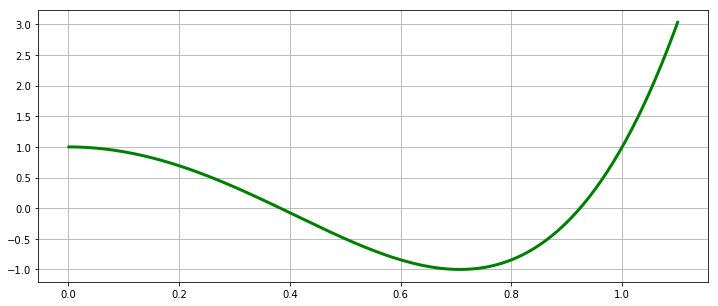

In [133]:
wt  = np.linspace(0.001,1.1,200)
tn = np.array(  [ X[0].subs({'w':i}) for i in wt ]   )

plt.figure(figsize=(12,5))
plt.plot(wt,tn,color='green',linewidth=3)
plt.grid(True)

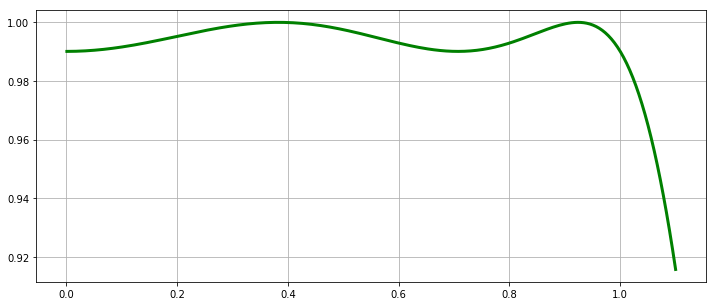

In [138]:
eps = 0.1

H = 1/(1 + (eps*tn)**2 )

plt.figure(figsize=(12,5))
plt.plot(wt,H,color='green',linewidth=3)
plt.grid(True)

In [171]:
N   = 5
eps = .1

k = np.arange(1,N+1)

sg_k = -np.sin( (2*k-1.)*np.pi/(2*N) )*np.sinh( 1./N*np.arcsinh(1./eps) )
w_k  =  np.cos( (2*k-1.)*np.pi/(2*N) )*np.cosh( 1./N*np.arcsinh(1./eps) )

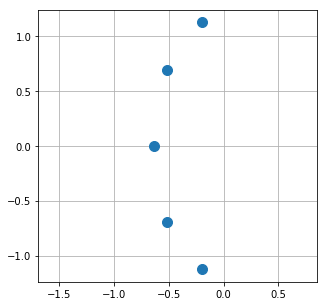

In [172]:
plt.figure(figsize=(5,5))
plt.plot(sg_k,w_k,'o',markersize=10)
plt.grid(True)
plt.axes().set_aspect('equal', 'datalim')

In [187]:
l = int(sg_k.shape[0]/2)
B = -2*sg_k
W = sg_k**2 + w_k**2

for i,j in zip(B,W):
    print ('S**2 +{:5.4f} S + {:5.4f}'.format(i,j))

S**2 +0.3932 S + 1.3093
S**2 +1.0294 S + 0.7503
S**2 +1.2725 S + 0.4048
S**2 +1.0294 S + 0.7503
S**2 +0.3932 S + 1.3093


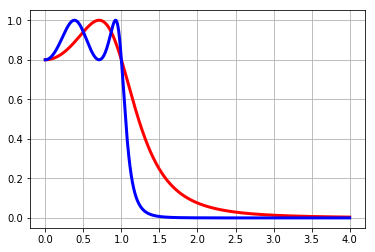

In [192]:
w  = np.linspace( 0,4,1000 )
p2 = 2*w**2 - 1
p4 = 8*w**4 - 8*w**2 + 1
e = .5

H2 = 1/( 1+e**2*p2**2 )
H4 = 1/( 1+e**2*p4**2 )

plt.plot( w,H2, 'r', linewidth=3 )
plt.plot( w,H4, 'b', linewidth=3 )
plt.grid(True)
plt.show()

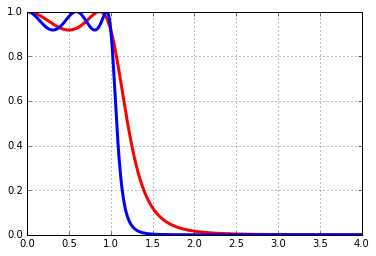

In [3]:
w  = np.linspace( 0,4,1000 )
p3 = 4*w**3  - 3*w
p5 = 16*w**5 - 20*w**3 + 5*w
e = .3

H3 = 1/( 1+e**2*p3**2 )
H5 = 1/( 1+e**2*p5**2 )

plt.plot( w,H3, 'r', linewidth=3 )
plt.plot( w,H5, 'b', linewidth=3 )
plt.grid(True)
plt.show()

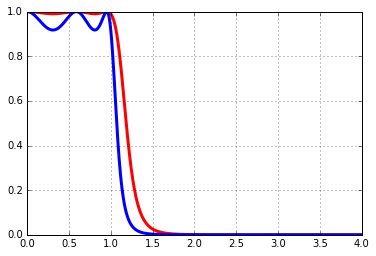

In [4]:
w  = np.linspace( 0,4,1000 )
p5 = 16*w**5 - 20*w**3 + 5*w
e1 = .1
e2 = .3

H5_1 = 1/( 1+e1**2*p5**2 )
H5_2 = 1/( 1+e2**2*p5**2 )

plt.plot( w,H5_1, 'r', linewidth=3 )
plt.plot( w,H5_2, 'b', linewidth=3 )
plt.grid(True)
plt.show()

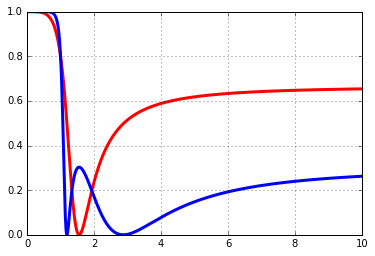

In [6]:
w  = np.linspace( .001,10,1000 )
wp = 1.
ws = 1.1

p2_num = 2*(ws/wp)**2 - 1
p2_den = 2*(ws/w )**2 - 1

p4_num = ( 8*(ws/wp)**4 - 8*(ws/wp)**2 + 1 )
p4_den = ( 8*(ws/w )**4 - 8*(ws/w )**2 + 1 )

e  = .5

H2 = 1/( 1+e**2*(p2_num**2/p2_den**2) )
H4 = 1/( 1+e**2*(p4_num**2/p4_den**2) )

plt.plot( w,H2, 'r', linewidth=3 )
plt.plot( w,H4, 'b', linewidth=3 )
plt.grid(True)
plt.show()

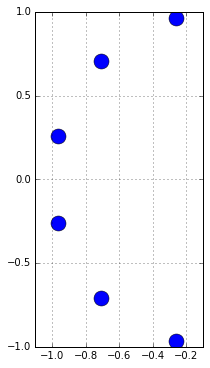

In [9]:
n = 6.
#k = np.arange(2*n)
k = np.arange(1,n+1)

p = np.pi*(2*k + n - 1 )/(2*n)

plt.figure(figsize=(3,6))
plt.plot( np.cos(p),np.sin(p),'o',markersize=15 )
plt.grid(True)
plt.axes().set_aspect('equal', 'datalim')
plt.show() 

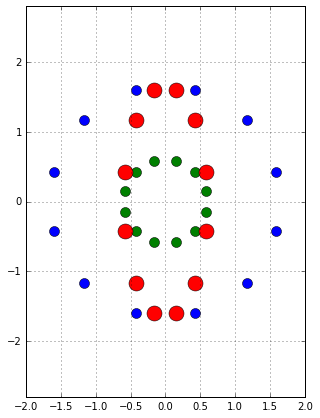

In [11]:
n = 6.
#k = np.arange(2*n)
k  = np.arange(1,2*n+1)
e  = .1
p  = np.pi*(2*k + n - 1 )/(2*n)
r1 = ( np.sqrt(1+e**2) + 1 )/e
r1 = r1**(1/n)
r2 = ( np.sqrt(1+e**2) - 1 )/e
r2 = r2**(1/n)

plt.figure(figsize=(5,7))
plt.plot( r2*np.cos(p),r2*np.sin(p),'go',markersize=10 )
plt.plot( r1*np.cos(p),r1*np.sin(p),'bo',markersize=10 )
plt.plot( r2*np.cos(p),r1*np.sin(p),'ro',markersize=15 )
plt.axes().set_aspect('equal', 'datalim')
plt.grid(True)
plt.show() 

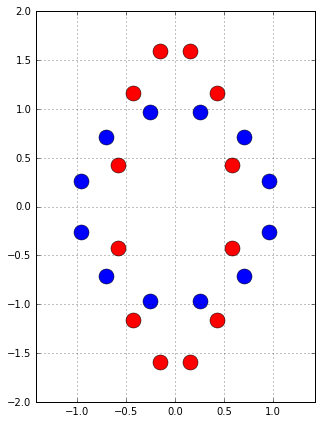

In [12]:
n = 6.
#k = np.arange(2*n)
k  = np.arange(1,2*n+1)
e  = .1
p  = np.pi*(2*k + n - 1 )/(2*n)
r1 = ( np.sqrt(1+e**2) + 1 )/e
r1 = r1**(1/n)
r2 = ( np.sqrt(1+e**2) - 1 )/e
r2 = r2**(1/n)

plt.figure(figsize=(5,7))
plt.plot( np.cos(p)   ,np.sin(p)   ,'bo',markersize=15 )
plt.plot( r2*np.cos(p),r1*np.sin(p),'ro',markersize=15 )
plt.axes().set_aspect('equal', 'datalim')
plt.grid(True)
plt.show() 